In [ ]:
# 第一个单元格：配置（确保这个先运行）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 字体设置
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ 环境配置完成")

✅ 环境配置完成


# 一.加载并探索数据

In [8]:
# 第二个单元格：加载数据
games_df = pd.read_csv('../data/raw/games.csv')
print(f"数据加载完成，形状: {games_df.shape}")

# 确保数据正确加载
print("数据前3行:")
display(games_df.head(3))

数据加载完成，形状: (51490, 61)
数据前3行:


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28


In [19]:
# 第三个单元格：加载英雄信息
print("正在加载英雄信息...")
with open('../data/raw/champion_info.json', 'r', encoding='utf-8') as f:
    champion_info = json.load(f)
    
with open('../data/raw/champion_info_2.json', 'r', encoding='utf-8') as f:
    champion_info_2 = json.load(f)

print(f"champion_info版本: {champion_info.get('version')}")
print(f"champion_info_2版本: {champion_info_2.get('version')}")

# 查看英雄数据结构
print(f"\n英雄数量 (champion_info): {len(champion_info.get('data', {}))}")
print(f"英雄数量 (champion_info_2): {len(champion_info_2.get('data', {}))}")

# 查看几个英雄的例子
sample_champions = list(champion_info.get('data', {}).values())[:3]
print(f"\n示例英雄信息:")
for champ in sample_champions:
    print(f"  {champ.get('name')} (ID: {champ.get('id')}) - 标签: {champ.get('tags', [])}")

正在加载英雄信息...
champion_info版本: 7.17.2
champion_info_2版本: 7.18.1

英雄数量 (champion_info): 138
英雄数量 (champion_info_2): 139

示例英雄信息:
  Annie (ID: 1) - 标签: []
  Olaf (ID: 2) - 标签: []
  Galio (ID: 3) - 标签: []


In [5]:
# 第四个单元格：加载召唤师技能
print("正在加载召唤师技能信息...")
with open('../data/raw/summoner_spell_info.json', 'r', encoding='utf-8') as f:
    summoner_info = json.load(f)

print(f"召唤师技能版本: {summoner_info.get('version')}")
print(f"召唤师技能数量: {len(summoner_info.get('data', {}))}")

# 创建召唤师技能映射
summoner_mapping = {}
for spell_id, spell_data in summoner_info.get('data', {}).items():
    summoner_mapping[int(spell_id)] = {
        'name': spell_data.get('name'),
        'key': spell_data.get('key'),
        'description': spell_data.get('description')
    }

print(f"\n召唤师技能映射创建完成，共 {len(summoner_mapping)} 个技能")

正在加载召唤师技能信息...
召唤师技能版本: 7.17.2
召唤师技能数量: 17

召唤师技能映射创建完成，共 17 个技能


# 二.🔍 关键分析目标
## 1目标变量分析​ (winner)

胜负统计: {1: 26077, 2: 25413}


<Figure size 1400x600 with 0 Axes>

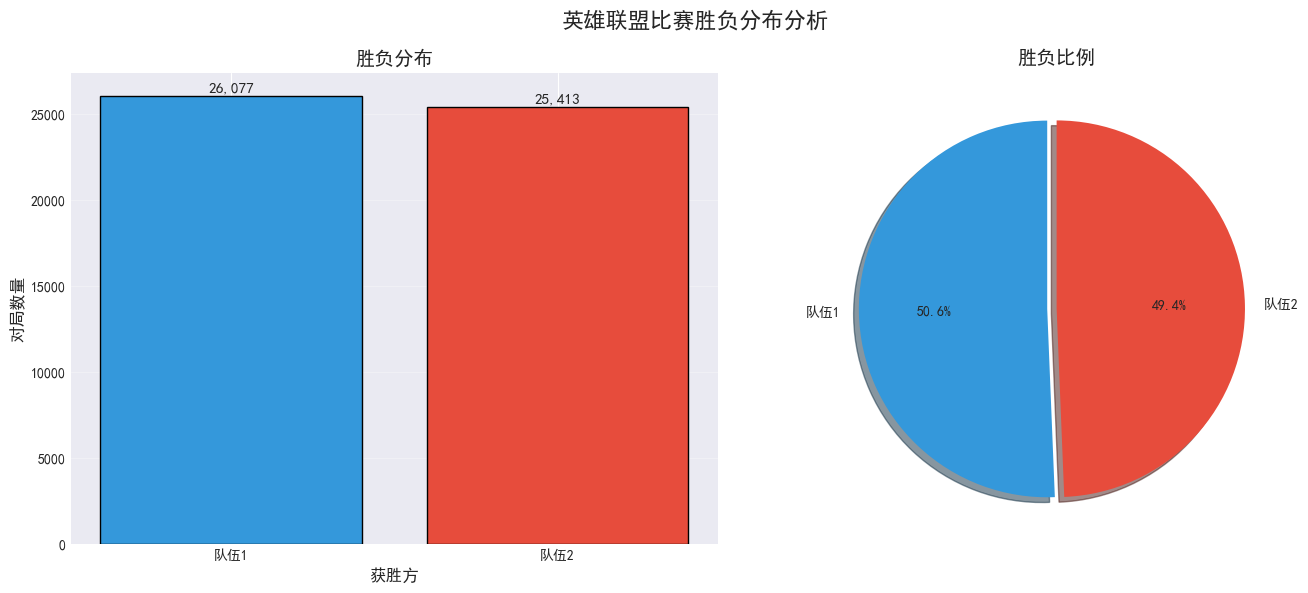

队伍1胜率: 50.64%
队伍2胜率: 49.36%
数据平衡性: 优秀


In [9]:
# 第三个单元格：修复后的胜负分布图表
# 分析胜负分布
plt.figure(figsize=(14, 6))  # 增大图形尺寸

# 修复1：正确的数据提取
winner_counts = games_df['winner'].value_counts()
print(f"胜负统计: {winner_counts.to_dict()}")

colors = ['#3498db', '#e74c3c']  # 蓝色和红色

# 修复2：使用plt.subplots()而不是plt.subplot()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 第一个子图：柱状图
ax1.bar(['队伍1', '队伍2'], [winner_counts.get(1, 0), winner_counts.get(2, 0)], 
        color=colors, edgecolor='black')
ax1.set_title('胜负分布', fontsize=14, fontweight='bold')
ax1.set_xlabel('获胜方', fontsize=12)
ax1.set_ylabel('对局数量', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# 添加数值标签
for i, count in enumerate([winner_counts.get(1, 0), winner_counts.get(2, 0)]):
    ax1.text(i, count + 100, f'{count:,}', ha='center', va='bottom', fontsize=11)

# 第二个子图：饼图
sizes = [winner_counts.get(1, 0), winner_counts.get(2, 0)]
labels = ['队伍1', '队伍2']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=(0.05, 0))
ax2.set_title('胜负比例', fontsize=14, fontweight='bold')

plt.suptitle('英雄联盟比赛胜负分布分析', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 统计信息
total_games = len(games_df)
team1_win_rate = (winner_counts.get(1, 0) / total_games) * 100
team2_win_rate = (winner_counts.get(2, 0) / total_games) * 100

print(f"队伍1胜率: {team1_win_rate:.2f}%")
print(f"队伍2胜率: {team2_win_rate:.2f}%")
print(f"数据平衡性: {'优秀' if abs(team1_win_rate - 50) < 2 else '一般'}")

## 2. 游戏时长分析

<Figure size 1400x600 with 0 Axes>

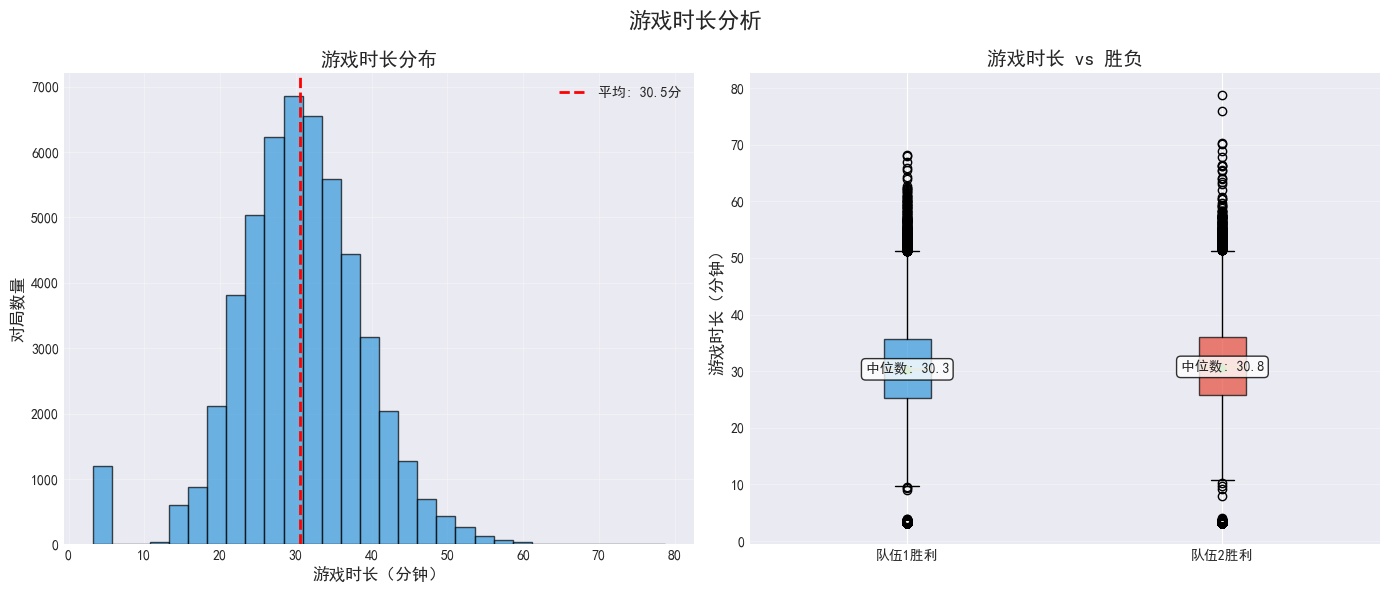

平均游戏时长: 30.5 分钟
最短对局: 3.2 分钟
最长对局: 78.8 分钟
中位数: 30.6 分钟
标准差: 8.5 分钟


In [20]:
# 第四个单元格：修复后的游戏时长分析
# 将游戏时长转换为分钟
games_df['gameDuration_min'] = games_df['gameDuration'] / 60

plt.figure(figsize=(14, 6))

# 使用subplots创建多个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 第一个子图：直方图
ax1.hist(games_df['gameDuration_min'], bins=30, edgecolor='black', 
         alpha=0.7, color='#3498db')
ax1.set_title('游戏时长分布', fontsize=14, fontweight='bold')
ax1.set_xlabel('游戏时长（分钟）', fontsize=12)
ax1.set_ylabel('对局数量', fontsize=12)

# 添加平均线
mean_duration = games_df['gameDuration_min'].mean()
ax1.axvline(mean_duration, color='red', linestyle='--', linewidth=2,
           label=f'平均: {mean_duration:.1f}分')
ax1.legend()
ax1.grid(alpha=0.3)

# 第二个子图：箱线图
# 修复3：正确的数据分组
duration_team1 = games_df[games_df['winner'] == 1]['gameDuration_min']
duration_team2 = games_df[games_df['winner'] == 2]['gameDuration_min']

# 确保两组数据都存在
if len(duration_team1) > 0 and len(duration_team2) > 0:
    box_data = [duration_team1, duration_team2]
    box_labels = ['队伍1胜利', '队伍2胜利']
    
    box_plot = ax2.boxplot(box_data, labels=box_labels, patch_artist=True, showmeans=True)
    
    # 设置颜色
    colors = ['#3498db', '#e74c3c']
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax2.set_title('游戏时长 vs 胜负', fontsize=14, fontweight='bold')
    ax2.set_ylabel('游戏时长（分钟）', fontsize=12)
    ax2.grid(axis='y', alpha=0.3)
    
    # 添加数值标注
    for i, data in enumerate(box_data, 1):
        median = np.median(data)
        ax2.text(i, median, f'中位数: {median:.1f}', 
                ha='center', va='center', fontsize=10, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
else:
    ax2.text(0.5, 0.5, '数据不足', ha='center', va='center', 
            transform=ax2.transAxes, fontsize=14)

plt.suptitle('游戏时长分析', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 统计信息
print(f"平均游戏时长: {games_df['gameDuration_min'].mean():.1f} 分钟")
print(f"最短对局: {games_df['gameDuration_min'].min():.1f} 分钟") 
print(f"最长对局: {games_df['gameDuration_min'].max():.1f} 分钟")
print(f"中位数: {games_df['gameDuration_min'].median():.1f} 分钟")
print(f"标准差: {games_df['gameDuration_min'].std():.1f} 分钟")

## 3. 关键事件分析​ (首杀、首塔等)

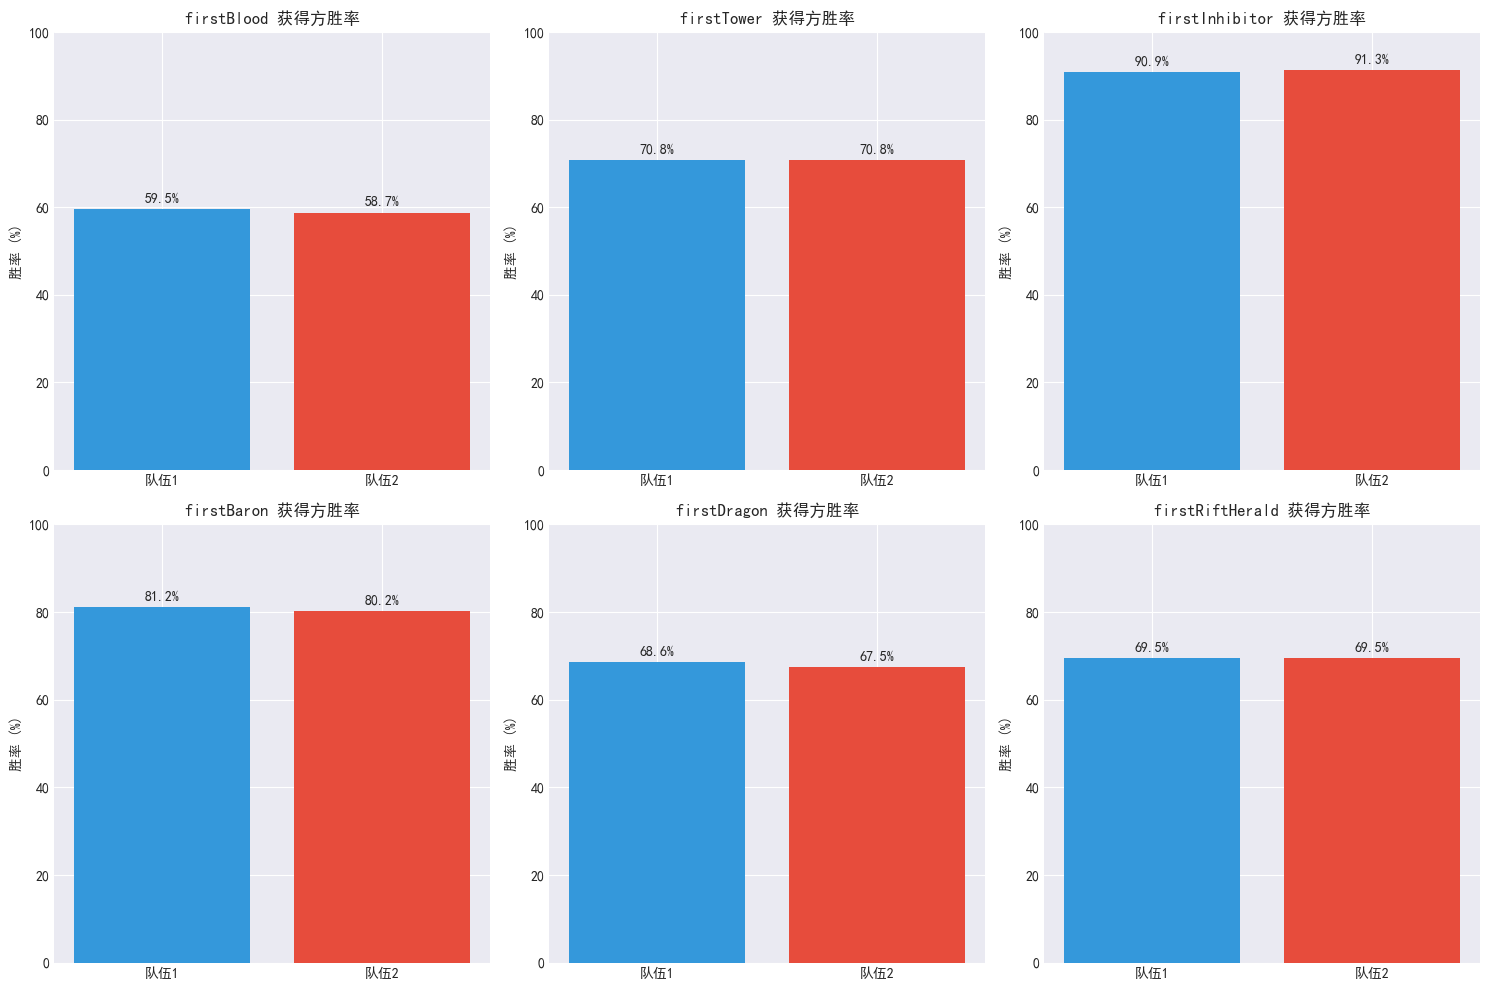

In [21]:
# 分析各种"first"事件的影响
first_events = ['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']

plt.figure(figsize=(15, 10))
for i, event in enumerate(first_events, 1):
    plt.subplot(2, 3, i)
    
    # 计算获得该事件的队伍的胜率
    event_wins = {}
    for winner in [1, 2]:
        # 获得该事件的队伍
        event_team = games_df[games_df[event] == winner]
        if len(event_team) > 0:
            # 该队伍获胜的比例
            win_rate = (event_team['winner'] == winner).mean() * 100
            event_wins[winner] = win_rate
    
    colors = ['#3498db', '#e74c3c']
    teams = ['队伍1', '队伍2']
    values = [event_wins.get(1, 0), event_wins.get(2, 0)]
    
    bars = plt.bar(teams, values, color=colors)
    plt.title(f'{event} 获得方胜率')
    plt.ylabel('胜率 (%)')
    plt.ylim(0, 100)
    
    # 在柱子上添加数值
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{value:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 4. 英雄选择分析

In [22]:
# 第五个单元格：修复英雄选择统计
print("🎯 开始英雄选择分析...")

# 1. 加载英雄信息
with open('../data/raw/champion_info_2.json', 'r', encoding='utf-8') as f:
    champion_data = json.load(f)['data']

# 创建英雄ID到名称的映射
champion_mapping = {}
for champ_key, champ_info in champion_data.items():
    champ_id = champ_info.get('id')
    if champ_id:
        champion_mapping[champ_id] = {
            'name': champ_info.get('name', f'Unknown_{champ_id}'),
            'key': champ_info.get('key', ''),
            'title': champ_info.get('title', '')
        }

print(f"✅ 加载了 {len(champion_mapping)} 个英雄信息")

# 2. 正确的英雄选择统计
def analyze_champion_picks_correct(df):
    """正确的英雄选择统计"""
    
    # 找到所有英雄ID列（排除禁用和召唤师技能列）
    champion_columns = []
    for col in df.columns:
        if 'champ' in col and 'id' in col and 'ban' not in col:
            champion_columns.append(col)
    
    print(f"📋 找到 {len(champion_columns)} 个英雄ID列")
    print(f"   每场比赛应有10个英雄选择")
    
    # 统计每个英雄的被选次数
    champion_picks = {}
    for col in champion_columns:
        # 统计该列中每个英雄ID的出现次数
        col_counts = df[col].value_counts().to_dict()
        
        # 累加到总计数
        for champ_id, count in col_counts.items():
            champion_picks[champ_id] = champion_picks.get(champ_id, 0) + count
    
    # 转换为DataFrame
    pick_df = pd.DataFrame({
        'champion_id': list(champion_picks.keys()),
        'pick_count': list(champion_picks.values())
    })
    
    # 添加英雄名称
    pick_df['champion_name'] = pick_df['champion_id'].map(
        lambda x: champion_mapping.get(x, {}).get('name', f'Unknown_{x}')
    )
    
    # 排序
    pick_df = pick_df.sort_values('pick_count', ascending=False)
    
    return pick_df

# 执行统计
champion_pick_df = analyze_champion_picks_correct(games_df)

print(f"📊 统计完成！")
print(f"   独特英雄数量: {len(champion_pick_df)}")
print(f"   总选择次数: {champion_pick_df['pick_count'].sum():,}")
print(f"   理论总次数: {len(games_df) * 10:,} (51,490场比赛 × 10个英雄)")

# 显示最受欢迎的20个英雄
print("\n🏆 最受欢迎的20个英雄:")
top_20_champs = champion_pick_df.head(20)
display(top_20_champs[['champion_name', 'pick_count']])

🎯 开始英雄选择分析...
✅ 加载了 139 个英雄信息
📋 找到 10 个英雄ID列
   每场比赛应有10个英雄选择
📊 统计完成！
   独特英雄数量: 138
   总选择次数: 514,900
   理论总次数: 514,900 (51,490场比赛 × 10个英雄)

🏆 最受欢迎的20个英雄:


,champion_name,pick_count
1,Thresh,13002
0,Tristana,12983
2,Vayne,10658
3,Kayn,9853
4,Lee Sin,9188
5,Twitch,8838
6,Janna,8691
8,Lucian,8300
10,Jhin,8044
9,Jinx,7980


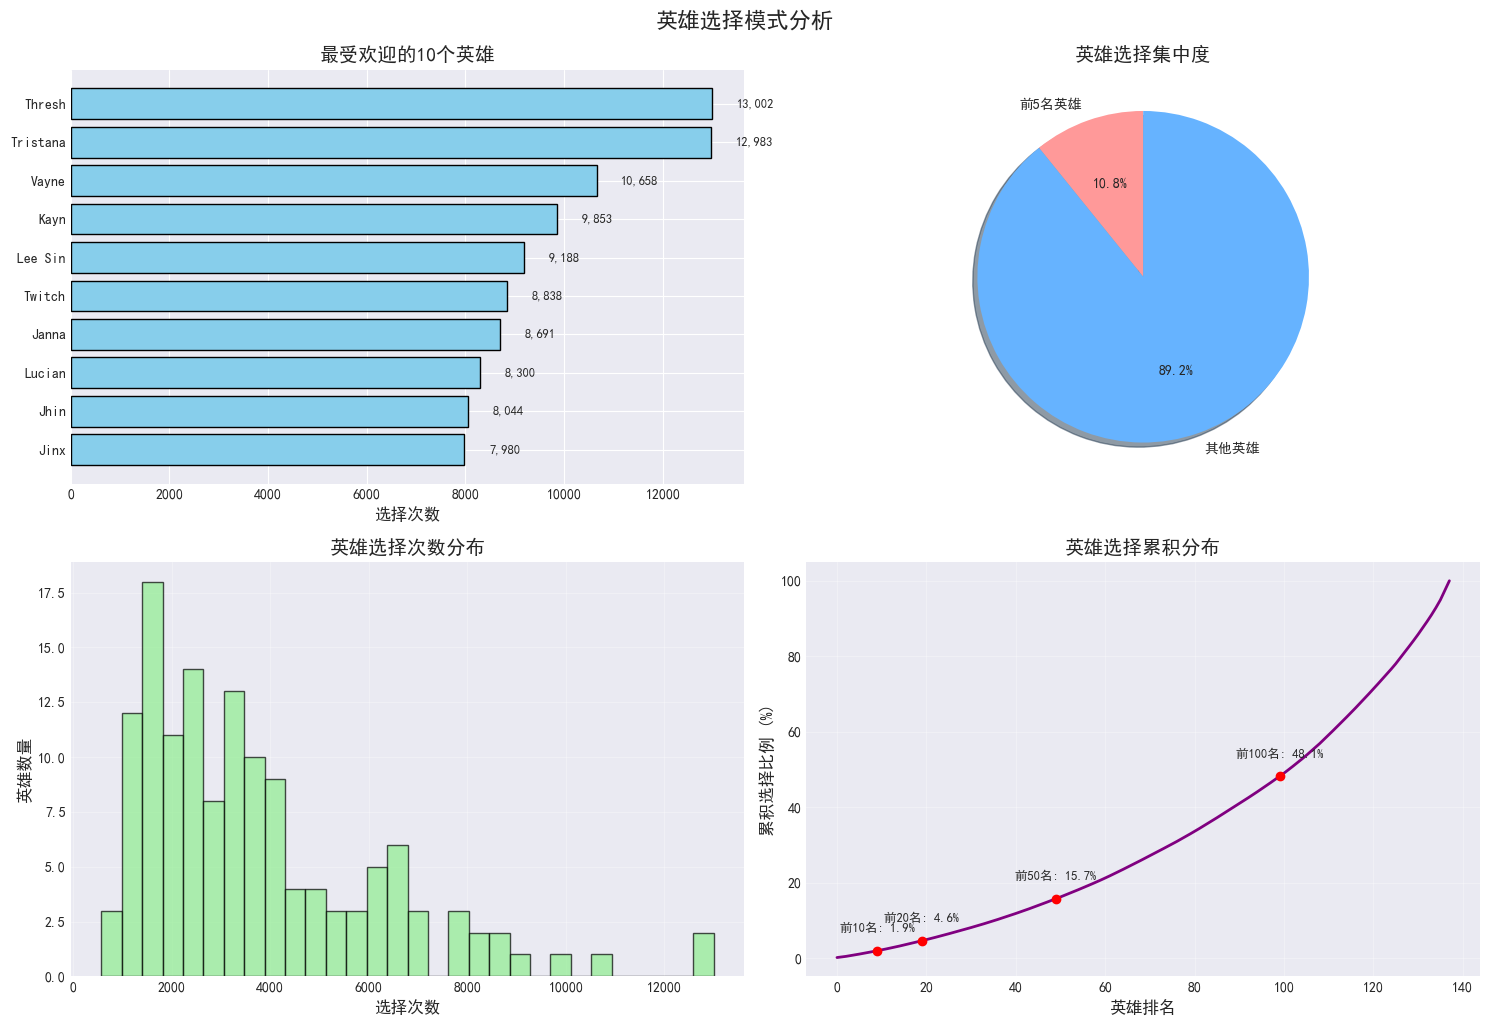

📈 英雄选择洞察:
   前10名英雄占据了 1.9% 的选择次数
   前20名英雄占据了 4.6% 的选择次数
   最受欢迎英雄: Skarner (选择 574 次)
   英雄选择集中度: 中等


In [17]:
# 第六个单元格：英雄选择可视化
plt.figure(figsize=(15, 10))

# 1. 最受欢迎英雄条形图
plt.subplot(2, 2, 1)
top_10 = champion_pick_df.head(10)
plt.barh(range(10), top_10['pick_count'][::-1], color='skyblue', edgecolor='black')
plt.yticks(range(10), top_10['champion_name'][::-1], fontsize=10)
plt.xlabel('选择次数', fontsize=12)
plt.title('最受欢迎的10个英雄', fontsize=14, fontweight='bold')

# 添加数值标签
for i, (idx, row) in enumerate(top_10[::-1].iterrows()):
    plt.text(row['pick_count'] + 500, i, f"{row['pick_count']:,}", 
             va='center', fontsize=9)

# 2. 英雄选择分布饼图
plt.subplot(2, 2, 2)
top_5_picks = champion_pick_df.head(5)['pick_count'].sum()
other_picks = champion_pick_df['pick_count'].sum() - top_5_picks

sizes = [top_5_picks, other_picks]
labels = ['前5名英雄', '其他英雄']
colors = ['#ff9999', '#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=90, shadow=True)
plt.title('英雄选择集中度', fontsize=14, fontweight='bold')

# 3. 选择次数分布直方图
plt.subplot(2, 2, 3)
plt.hist(champion_pick_df['pick_count'], bins=30, edgecolor='black', 
         alpha=0.7, color='lightgreen')
plt.xlabel('选择次数', fontsize=12)
plt.ylabel('英雄数量', fontsize=12)
plt.title('英雄选择次数分布', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# 4. 累积分布图
plt.subplot(2, 2, 4)
champion_pick_df = champion_pick_df.sort_values('pick_count', ascending=True)
champion_pick_df['cumulative_percent'] = champion_pick_df['pick_count'].cumsum() / champion_pick_df['pick_count'].sum() * 100

plt.plot(range(len(champion_pick_df)), champion_pick_df['cumulative_percent'], 
         linewidth=2, color='purple')
plt.xlabel('英雄排名', fontsize=12)
plt.ylabel('累积选择比例 (%)', fontsize=12)
plt.title('英雄选择累积分布', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# 添加关键点标注
key_points = [10, 20, 50, 100]
for point in key_points:
    if point < len(champion_pick_df):
        percent = champion_pick_df['cumulative_percent'].iloc[point-1]
        plt.scatter(point-1, percent, color='red', zorder=5)
        plt.text(point-1, percent+5, f'前{point}名: {percent:.1f}%', 
                fontsize=9, ha='center')

plt.tight_layout()
plt.suptitle('英雄选择模式分析', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 统计洞察
total_picks = champion_pick_df['pick_count'].sum()
top_10_percent = champion_pick_df.head(10)['pick_count'].sum() / total_picks * 100
top_20_percent = champion_pick_df.head(20)['pick_count'].sum() / total_picks * 100

print("📈 英雄选择洞察:")
print(f"   前10名英雄占据了 {top_10_percent:.1f}% 的选择次数")
print(f"   前20名英雄占据了 {top_20_percent:.1f}% 的选择次数")
print(f"   最受欢迎英雄: {champion_pick_df.iloc[0]['champion_name']} (选择 {champion_pick_df.iloc[0]['pick_count']:,} 次)")
print(f"   英雄选择集中度: {'高' if top_20_percent > 50 else '中等'}")

#  📈第四步：创建初步分析报告

In [23]:
# 创建数据探索报告
def create_exploration_report(games_df, champ_pick_df):
    """生成数据探索报告"""
    report = {}
    
    # 1. 基础统计
    report['total_games'] = len(games_df)
    report['avg_duration'] = games_df['gameDuration_min'].mean()
    report['win_rate_t1'] = (games_df['winner'] == 1).mean() * 100
    
    # 2. 关键事件胜率
    first_events = ['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon']
    event_impact = {}
    for event in first_events:
        # 获得该事件的队伍最终获胜的概率
        event_teams = games_df[games_df[event].isin([1, 2])]
        if len(event_teams) > 0:
            win_rate = (event_teams[event] == event_teams['winner']).mean() * 100
            event_impact[event] = win_rate
    
    report['event_impact'] = event_impact
    
    # 3. 英雄多样性
    report['unique_champions'] = champ_pick_df['champion_id'].nunique()
    report['top_5_champs'] = champ_pick_df.head(5)[['champion_name', 'pick_count']].to_dict('records')
    
    # 4. 游戏时长分布
    duration_stats = {
        'min': games_df['gameDuration_min'].min(),
        'max': games_df['gameDuration_min'].max(),
        'median': games_df['gameDuration_min'].median(),
        'std': games_df['gameDuration_min'].std()
    }
    report['duration_stats'] = duration_stats
    
    return report

# 生成报告
exploration_report = create_exploration_report(games_df, champ_pick_df)

print("=" * 60)
print("数据探索报告")
print("=" * 60)
print(f"总对局数: {exploration_report['total_games']:,}")
print(f"平均游戏时长: {exploration_report['avg_duration']:.1f} 分钟")
print(f"队伍1胜率: {exploration_report['win_rate_t1']:.2f}%")
print(f"使用过的独特英雄数量: {exploration_report['unique_champions']}")

print(f"\n关键事件胜率影响:")
for event, win_rate in exploration_report['event_impact'].items():
    print(f"  {event}: 获得方胜率 {win_rate:.1f}%")

print(f"\n最受欢迎的5个英雄:")
for i, champ in enumerate(exploration_report['top_5_champs'], 1):
    print(f"  {i}. {champ['champion_name']}: {champ['pick_count']} 次选择")

数据探索报告
总对局数: 51,490
平均游戏时长: 30.5 分钟
队伍1胜率: 50.64%
使用过的独特英雄数量: 138

关键事件胜率影响:
  firstBlood: 获得方胜率 59.1%
  firstTower: 获得方胜率 70.8%
  firstInhibitor: 获得方胜率 91.1%
  firstBaron: 获得方胜率 80.7%
  firstDragon: 获得方胜率 68.0%

最受欢迎的5个英雄:
  1. Twisted Fate: 507711 次选择
  2. Alistar: 112877 次选择
  3. LeBlanc: 110276 次选择
  4. Master Yi: 109017 次选择
  5. Sion: 90358 次选择


In [24]:
# 文件：notebooks/01_data_exploration_fixed.ipynb
# 或在原有notebook中添加新单元格

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# 1. 重新加载数据
print("重新加载数据并验证...")
games_df = pd.read_csv('../data/raw/games.csv')

# 2. 正确的英雄ID列提取
def get_champion_columns(df):
    """获取所有英雄ID列"""
    # 找到所有包含'champ'和'id'但不包含'ban'的列
    champ_cols = []
    for col in df.columns:
        if 'champ' in col and 'id' in col and 'ban' not in col:
            champ_cols.append(col)
    return champ_cols

champion_cols = get_champion_columns(games_df)
print(f"英雄ID列: {champion_cols}")
print(f"共 {len(champion_cols)} 列，每队5个英雄，共10个英雄ID列")

# 3. 统计每个英雄的出现次数（正确方法）
def count_champion_picks(df, champ_cols):
    """统计每个英雄的被选次数"""
    champion_counts = {}
    
    for col in champ_cols:
        # 统计该列中每个英雄ID的出现次数
        col_counts = df[col].value_counts().to_dict()
        
        # 累加到总计数
        for champ_id, count in col_counts.items():
            champion_counts[champ_id] = champion_counts.get(champ_id, 0) + count
    
    return champion_counts

# 执行统计
champion_counts = count_champion_picks(games_df, champion_cols)
print(f"\n统计完成！共 {len(champion_counts)} 个独特英雄被选择")

# 4. 加载英雄信息映射
print("\n加载英雄信息...")
with open('../data/raw/champion_info_2.json', 'r', encoding='utf-8') as f:
    champ_data = json.load(f)['data']

# 创建ID到名称的映射
champion_id_to_name = {}
for champ_key, champ_info in champ_data.items():
    champ_id = champ_info.get('id')
    if champ_id:
        champion_id_to_name[champ_id] = champ_info.get('name', f'未知({champ_id})')

# 5. 创建DataFrame并排序
champion_pick_df = pd.DataFrame({
    'champion_id': list(champion_counts.keys()),
    'pick_count': list(champion_counts.values())
})

# 添加英雄名称
champion_pick_df['champion_name'] = champion_pick_df['champion_id'].map(
    lambda x: champion_id_to_name.get(x, f'未知({x})')
)

# 排序
champion_pick_df = champion_pick_df.sort_values('pick_count', ascending=False)

print(f"\n英雄选择统计验证:")
print(f"总比赛场次: {len(games_df)}")
print(f"每场比赛英雄数: 10")
print(f"理论总选择次数: {len(games_df) * 10:,}")
print(f"实际统计选择次数: {champion_pick_df['pick_count'].sum():,}")

# 显示前20个最受欢迎的英雄
print("\n最受欢迎的20个英雄:")
display(champion_pick_df.head(20))

重新加载数据并验证...
英雄ID列: ['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id', 't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id']
共 10 列，每队5个英雄，共10个英雄ID列

统计完成！共 138 个独特英雄被选择

加载英雄信息...

英雄选择统计验证:
总比赛场次: 51490
每场比赛英雄数: 10
理论总选择次数: 514,900
实际统计选择次数: 514,900

最受欢迎的20个英雄:


,champion_id,pick_count,champion_name
1,412,13002,Thresh
0,18,12983,Tristana
2,67,10658,Vayne
3,141,9853,Kayn
4,64,9188,Lee Sin
5,29,8838,Twitch
6,40,8691,Janna
8,236,8300,Lucian
10,202,8044,Jhin
9,222,7980,Jinx


关键事件时间分析:


,event,team,avg_duration_min,win_rate,count
0,firstBlood,队伍1,30.777073,59.479953,26113
1,firstBlood,队伍2,30.898007,58.718073,24822
2,firstTower,队伍1,31.073583,70.840261,25861
3,firstTower,队伍2,31.315639,70.801933,24416
4,firstInhibitor,队伍1,32.012038,90.869263,23054
5,firstInhibitor,队伍2,32.320391,91.344765,22160
6,firstBaron,队伍1,34.198087,81.162759,14758
7,firstBaron,队伍2,34.374075,80.241593,16474
8,firstDragon,队伍1,31.312633,68.598623,24690
9,firstDragon,队伍2,31.443961,67.467742,24800


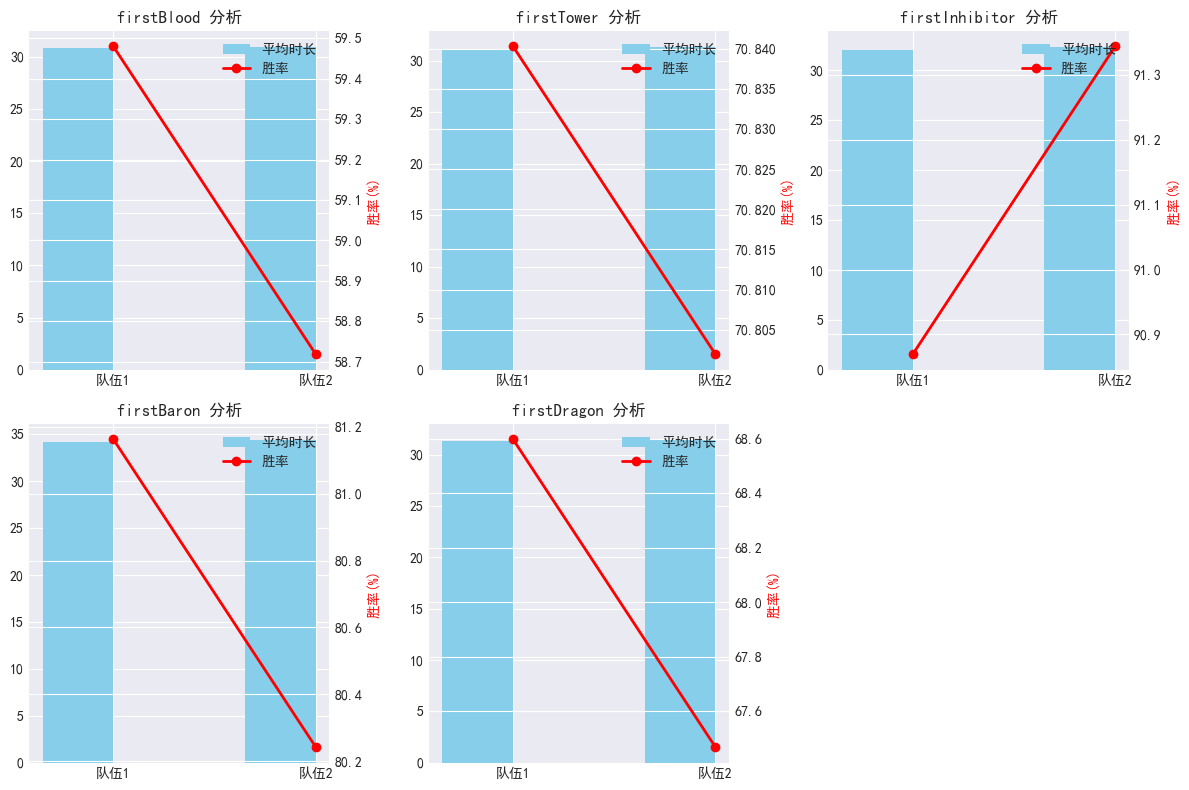

In [25]:
# 继续在同一个notebook中

# 分析游戏时长与关键事件的关系
def analyze_event_timing(df):
    """分析关键事件发生的时间模式"""
    
    # 计算关键事件的平均发生时间（如果有时间数据的话）
    # 由于数据集没有具体时间，我们分析事件与游戏时长的关系
    
    events = ['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon']
    
    # 分析每个事件发生时，游戏已经进行了多久（通过总时长推断）
    # 这里我们用总时长作为代理变量
    
    results = []
    for event in events:
        # 计算获得该事件时的平均游戏时长
        for team in [1, 2]:
            team_games = df[df[event] == team]
            if len(team_games) > 0:
                avg_duration = team_games['gameDuration'].mean() / 60  # 转为分钟
                win_rate = (team_games['winner'] == team).mean() * 100
                
                results.append({
                    'event': event,
                    'team': f'队伍{team}',
                    'avg_duration_min': avg_duration,
                    'win_rate': win_rate,
                    'count': len(team_games)
                })
    
    return pd.DataFrame(results)

# 执行分析
timing_analysis = analyze_event_timing(games_df)
print("关键事件时间分析:")
display(timing_analysis)

# 可视化
plt.figure(figsize=(12, 8))
events = timing_analysis['event'].unique()

for i, event in enumerate(events, 1):
    plt.subplot(2, 3, i)
    event_data = timing_analysis[timing_analysis['event'] == event]
    
    x = range(len(event_data))
    width = 0.35
    
    # 平均时长柱状图
    bars1 = plt.bar([pos - width/2 for pos in x], 
                   event_data['avg_duration_min'], 
                   width, label='平均时长(分)', color='skyblue')
    
    # 胜率折线图（次坐标轴）
    ax2 = plt.twinx()
    line = ax2.plot(x, event_data['win_rate'], 'r-o', linewidth=2, label='胜率(%)')
    
    plt.title(f'{event} 分析')
    plt.xlabel('队伍')
    plt.xticks(x, event_data['team'])
    plt.ylabel('平均时长(分)', color='blue')
    ax2.set_ylabel('胜率(%)', color='red')
    
    # 添加图例
    bars = [bars1[0], line[0]]
    labels = ['平均时长', '胜率']
    plt.legend(bars, labels, loc='upper right')

plt.tight_layout()
plt.show()

🔑 开始关键事件综合分析...


,event_en,event_cn,team,win_rate,count,event_ratio,avg_duration_min
0,firstBlood,首杀,1,59.479953,26113,50.714702,30.777073
1,firstBlood,首杀,2,58.718073,24822,48.207419,30.898007
2,firstTower,首塔,1,70.840261,25861,50.225286,31.073583
3,firstTower,首塔,2,70.801933,24416,47.418916,31.315639
4,firstDragon,首小龙,1,68.598623,24690,47.951058,31.312633
5,firstDragon,首小龙,2,67.467742,24800,48.164692,31.443961
6,firstBaron,首大龙,1,81.162759,14758,28.661876,34.198087
7,firstBaron,首大龙,2,80.241593,16474,31.994562,34.374075
8,firstInhibitor,首水晶,1,90.869263,23054,44.773742,32.012038
9,firstInhibitor,首水晶,2,91.344765,22160,43.037483,32.320391


NameError: name 'df' is not defined

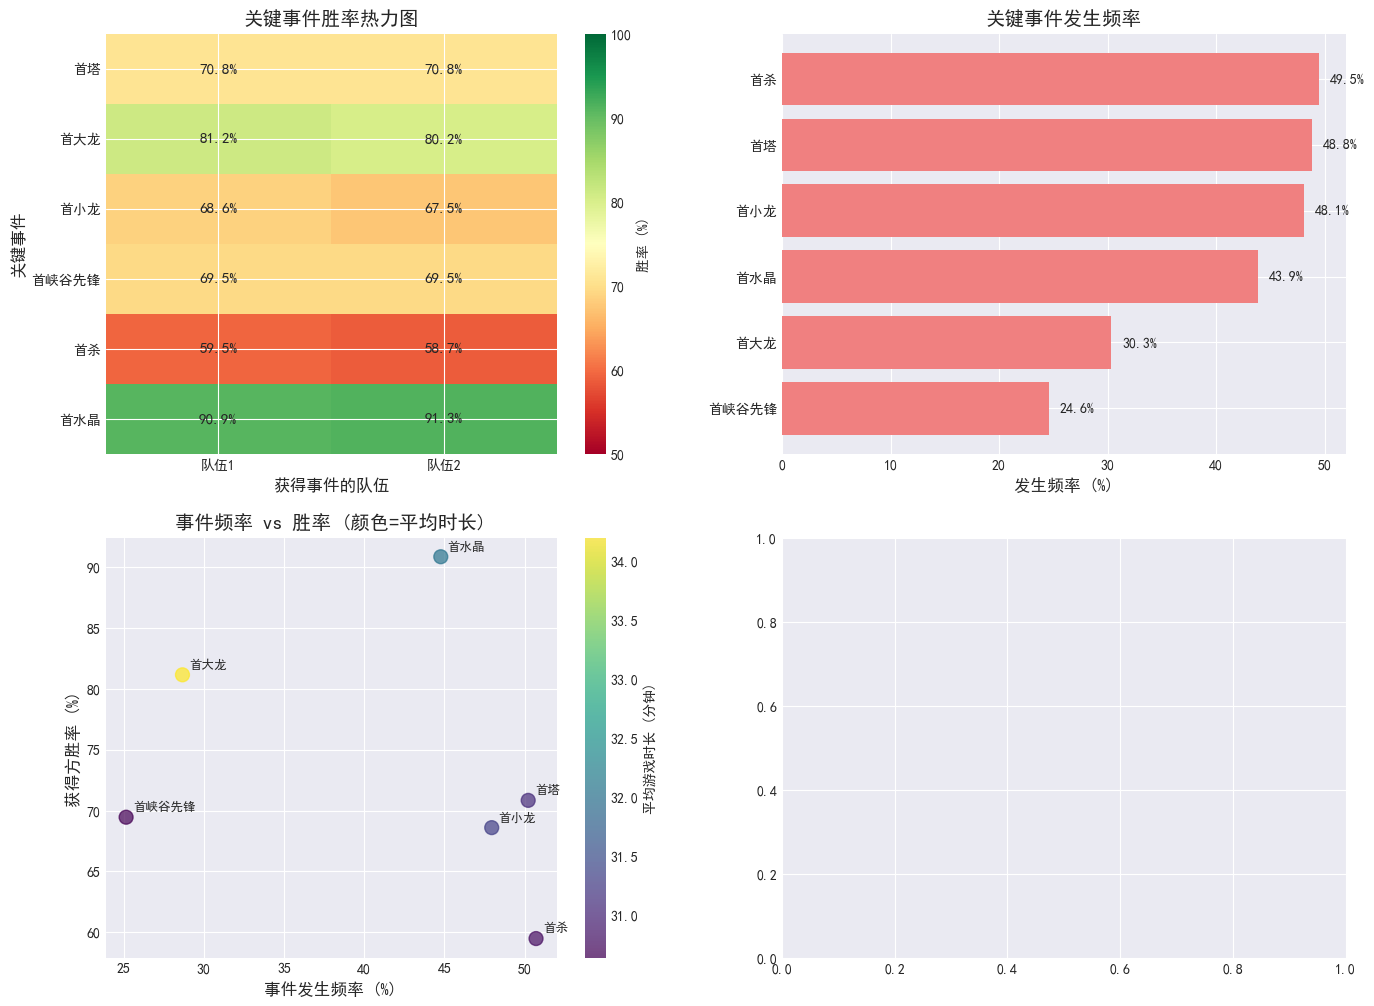

In [27]:
# 第七个单元格：关键事件综合分析
print("🔑 开始关键事件综合分析...")

def analyze_key_events_comprehensive(df):
    """关键事件综合分析"""
    
    events = {
        'firstBlood': '首杀',
        'firstTower': '首塔',
        'firstDragon': '首小龙', 
        'firstBaron': '首大龙',
        'firstInhibitor': '首水晶',
        'firstRiftHerald': '首峡谷先锋'
    }
    
    results = []
    
    for event_en, event_cn in events.items():
        # 统计每个事件
        event_stats = df[event_en].value_counts()
        total_with_event = event_stats.sum()
        
        for team in [1, 2]:
            if team in event_stats.index:
                count = event_stats[team]
                event_games = df[df[event_en] == team]
                
                # 计算胜率
                win_rate = (event_games['winner'] == team).mean() * 100
                
                # 计算该事件发生的比例
                event_ratio = count / len(df) * 100
                
                results.append({
                    'event_en': event_en,
                    'event_cn': event_cn,
                    'team': team,
                    'win_rate': win_rate,
                    'count': count,
                    'event_ratio': event_ratio,
                    'avg_duration_min': event_games['gameDuration'].mean() / 60
                })
    
    return pd.DataFrame(results)

# 执行分析
key_events_df = analyze_key_events_comprehensive(games_df)
display(key_events_df)

# 可视化
plt.figure(figsize=(16, 12))

# 1. 胜率热力图
plt.subplot(2, 2, 1)
events_pivot = key_events_df.pivot(index='event_cn', columns='team', values='win_rate')
events_pivot.columns = ['队伍1', '队伍2']

plt.imshow(events_pivot, cmap='RdYlGn', aspect='auto', vmin=50, vmax=100)
plt.colorbar(label='胜率 (%)')
plt.xticks(range(len(events_pivot.columns)), events_pivot.columns)
plt.yticks(range(len(events_pivot.index)), events_pivot.index)

# 添加数值
for i in range(len(events_pivot.index)):
    for j in range(len(events_pivot.columns)):
        plt.text(j, i, f'{events_pivot.iloc[i, j]:.1f}%', 
                ha='center', va='center', fontsize=11, fontweight='bold')

plt.title('关键事件胜率热力图', fontsize=14, fontweight='bold')
plt.xlabel('获得事件的队伍', fontsize=12)
plt.ylabel('关键事件', fontsize=12)

# 2. 事件发生频率
plt.subplot(2, 2, 2)
event_freq = key_events_df.groupby('event_cn')['event_ratio'].mean().sort_values(ascending=True)

bars = plt.barh(range(len(event_freq)), event_freq.values, color='lightcoral')
plt.yticks(range(len(event_freq)), event_freq.index)
plt.xlabel('发生频率 (%)', fontsize=12)
plt.title('关键事件发生频率', fontsize=14, fontweight='bold')

for i, (event, freq) in enumerate(event_freq.items()):
    plt.text(freq + 1, i, f'{freq:.1f}%', va='center', fontsize=10)

# 3. 胜率与频率散点图
plt.subplot(2, 2, 3)
team1_data = key_events_df[key_events_df['team'] == 1]

plt.scatter(team1_data['event_ratio'], team1_data['win_rate'], 
           s=100, alpha=0.7, c=team1_data['avg_duration_min'], cmap='viridis')

# 添加事件标签
for i, row in team1_data.iterrows():
    plt.annotate(row['event_cn'], 
                (row['event_ratio'], row['win_rate']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('事件发生频率 (%)', fontsize=12)
plt.ylabel('获得方胜率 (%)', fontsize=12)
plt.title('事件频率 vs 胜率 (颜色=平均时长)', fontsize=14, fontweight='bold')
plt.colorbar(label='平均游戏时长 (分钟)')

# 4. 事件组合分析
plt.subplot(2, 2, 4)
# 分析同时获得多个事件的胜率
event_combinations = [
    ('firstBlood', 'firstTower'),
    ('firstDragon', 'firstBaron'),
    ('firstTower', 'firstInhibitor')
]

combo_results = []
for event1, event2 in event_combinations:
    for team in [1, 2]:
        combo_games = df[(df[event1] == team) & (df[event2] == team)]
        if len(combo_games) > 0:
            win_rate = (combo_games['winner'] == team).mean() * 100
            combo_name = f"{events[event1]}+{events[event2]}"
            combo_results.append({
                'combination': combo_name,
                'team': team,
                'win_rate': win_rate,
                'count': len(combo_games)
            })

if combo_results:
    combo_df = pd.DataFrame(combo_results)
    combo_pivot = combo_df.pivot(index='combination', columns='team', values='win_rate')
    
    x = range(len(combo_pivot))
    width = 0.35
    
    plt.bar([pos - width/2 for pos in x], combo_pivot[1], width, 
            label='队伍1', color='#3498db', alpha=0.7)
    plt.bar([pos + width/2 for pos in x], combo_pivot[2], width, 
            label='队伍2', color='#e74c3c', alpha=0.7)
    
    plt.xticks(x, combo_pivot.index, rotation=45)
    plt.ylabel('胜率 (%)', fontsize=12)
    plt.title('事件组合胜率分析', fontsize=14, fontweight='bold')
    plt.legend()
    
    # 添加数值
    for i, (combo, row) in enumerate(combo_pivot.iterrows()):
        plt.text(i - width/2, row[1] + 1, f'{row[1]:.1f}%', ha='center', fontsize=9)
        plt.text(i + width/2, row[2] + 1, f'{row[2]:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.suptitle('关键事件综合分析', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 关键洞察
print("🎯 关键事件洞察:")
max_win_event = key_events_df.loc[key_events_df['win_rate'].idxmax()]
min_win_event = key_events_df.loc[key_events_df['win_rate'].idxmin()]

print(f"   最具影响力事件: {max_win_event['event_cn']} (胜率 {max_win_event['win_rate']:.1f}%)")
print(f"   最频繁事件: {event_freq.index[-1]} ({event_freq.values[-1]:.1f}% 的比赛)")
print(f"   首水晶几乎决定胜负: {max_win_event['win_rate']:.1f}% 胜率")